In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

In [2]:
data = [
    {'Day': 'D1', 'Weather': 'Sunny', 'TimeOfDay': 'Morning', 'SleepQuality': 'Poor', 'Mood': 'Tired', 'BuyCoffee': 'Yes'},
    {'Day': 'D2', 'Weather': 'Rainy', 'TimeOfDay': 'Morning', 'SleepQuality': 'Good', 'Mood': 'Fresh', 'BuyCoffee': 'No'},
    {'Day': 'D3', 'Weather': 'Overcast', 'TimeOfDay': 'Afternoon', 'SleepQuality': 'Poor', 'Mood': 'Tired', 'BuyCoffee': 'Yes'},
    {'Day': 'D4', 'Weather': 'Sunny', 'TimeOfDay': 'Afternoon', 'SleepQuality': 'Good', 'Mood': 'Energetic', 'BuyCoffee': 'No'},
    {'Day': 'D5', 'Weather': 'Rainy', 'TimeOfDay': 'Evening', 'SleepQuality': 'Poor', 'Mood': 'Tired', 'BuyCoffee': 'Yes'},
    {'Day': 'D6', 'Weather': 'Sunny', 'TimeOfDay': 'Morning', 'SleepQuality': 'Good', 'Mood': 'Fresh', 'BuyCoffee': 'No'},
    {'Day': 'D7', 'Weather': 'Overcast', 'TimeOfDay': 'Morning', 'SleepQuality': 'Poor', 'Mood': 'Tired', 'BuyCoffee': 'Yes'},
    {'Day': 'D8', 'Weather': 'Rainy', 'TimeOfDay': 'Afternoon', 'SleepQuality': 'Good', 'Mood': 'Tired', 'BuyCoffee': 'Yes'},
    {'Day': 'D9', 'Weather': 'Sunny', 'TimeOfDay': 'Evening', 'SleepQuality': 'Good', 'Mood': 'Energetic', 'BuyCoffee': 'No'},
    {'Day': 'D10','Weather': 'Rainy', 'TimeOfDay': 'Morning', 'SleepQuality': 'Poor', 'Mood': 'Tired', 'BuyCoffee': 'Yes'}
]

In [3]:
df = pd.DataFrame(data)
X_raw = df.drop(columns=['Day', 'BuyCoffee'])
y = df['BuyCoffee']

In [4]:
vec = DictVectorizer(sparse=False)
X = vec.fit_transform(X_raw.to_dict(orient='records'))

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

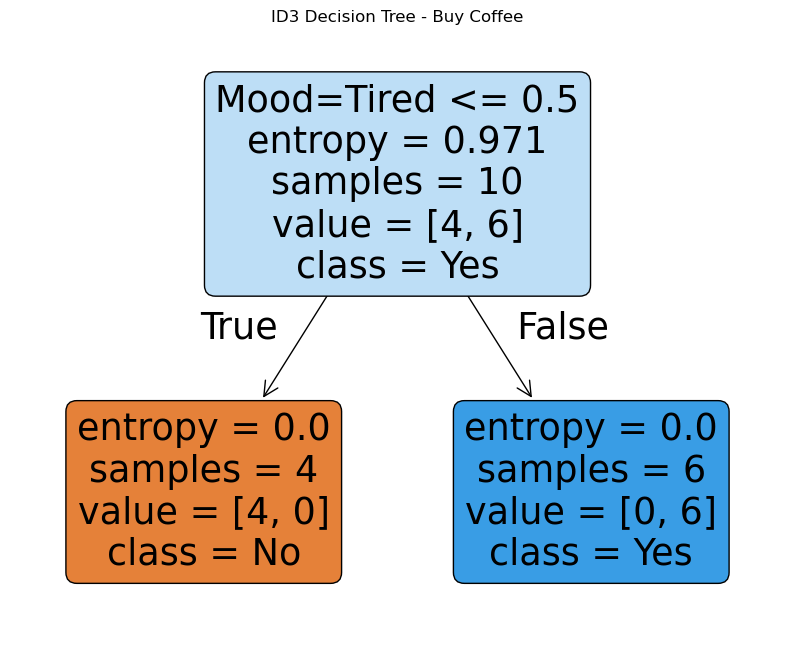

In [6]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=vec.get_feature_names_out(), class_names=clf.classes_, filled=True, rounded=True)
plt.title("ID3 Decision Tree - Buy Coffee")
plt.show()

In [7]:
test_case = {
    'Weather': 'Rainy',
    'TimeOfDay': 'Morning',
    'SleepQuality': 'Poor',
    'Mood': 'Tired'
}
X_test = vec.transform([test_case])
prediction = clf.predict(X_test)[0]
print("Prediction for input:", test_case)
print("Buy Coffee Prediction:", prediction)

Prediction for input: {'Weather': 'Rainy', 'TimeOfDay': 'Morning', 'SleepQuality': 'Poor', 'Mood': 'Tired'}
Buy Coffee Prediction: Yes


In [8]:
def explain_decision_path(model, vec, input_dict):
    feature_names = vec.get_feature_names_out()
    x_sample = vec.transform([input_dict])
    node_indicator = model.decision_path(x_sample)
    leave_id = model.apply(x_sample)

    print("\nDecision Path Explanation:")
    for node_id in node_indicator.indices:
        if node_id == leave_id[0]:
            print(f"Reached leaf node: Predict = {model.classes_[model.predict(x_sample)[0] == model.classes_].item()}")
            break
        feature_index = model.tree_.feature[node_id]
        threshold = model.tree_.threshold[node_id]
        feature_value = x_sample[0, feature_index]
        decision = "<=" if feature_value <= threshold else ">"
        print(f"{feature_names[feature_index]} (value={feature_value:.2f}) {decision} {threshold:.2f}")

explain_decision_path(clf, vec, test_case)


Decision Path Explanation:
Mood=Tired (value=1.00) > 0.50
Reached leaf node: Predict = Yes
